# Experiment 6

This experiment investigates the convergence rates when $p = O(n)$, using saturated features.

With this rate, we expect a gap between in-sample and out-sample performance of $O(\sqrt{n}/\lambda)$.

In [14]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import numpy as np
import cvxpy as cvx
from model.distrs import StudentTDistribution,DiscreteDistribution,NormalDistribution
from model.distrs import E,Var,Std
import model.synth_data as synth
import model.utility as ut
import model.problem as pr

from helper.stats import five_stats

In [16]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (6,4)
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['savefig.dpi'] = 100
plt.rc('text',usetex=True)
plt.rc('font',serif='times')

In [17]:
ps = np.arange(4,61)
p_true = max(ps)
ns = np.floor(2*ps)
n_true = 50000
n_experiments = 150
λ = 3
δ = 0.2

#Utility
β = 1
r_threshold = 60
u = ut.LinearPlateauUtility(β,r_threshold)

Rf = 0 

In [18]:
np.array([ps,ns]).T

array([[   4.,    8.],
       [   5.,   10.],
       [   6.,   12.],
       [   7.,   14.],
       [   8.,   16.],
       [   9.,   18.],
       [  10.,   20.],
       [  11.,   22.],
       [  12.,   24.],
       [  13.,   26.],
       [  14.,   28.],
       [  15.,   30.],
       [  16.,   32.],
       [  17.,   34.],
       [  18.,   36.],
       [  19.,   38.],
       [  20.,   40.],
       [  21.,   42.],
       [  22.,   44.],
       [  23.,   46.],
       [  24.,   48.],
       [  25.,   50.],
       [  26.,   52.],
       [  27.,   54.],
       [  28.,   56.],
       [  29.,   58.],
       [  30.,   60.],
       [  31.,   62.],
       [  32.,   64.],
       [  33.,   66.],
       [  34.,   68.],
       [  35.,   70.],
       [  36.,   72.],
       [  37.,   74.],
       [  38.,   76.],
       [  39.,   78.],
       [  40.,   80.],
       [  41.,   82.],
       [  42.,   84.],
       [  43.,   86.],
       [  44.,   88.],
       [  45.,   90.],
       [  46.,   92.],
       [  4

In [19]:
# True market
R_true = NormalDistribution(8,10)
X_true = [1/np.sqrt(2)*StudentTDistribution(ν=4) for _ in range(p_true)]
M_true = synth.GaussianMarket(X_true,R_true)

# Discretized market
X,R = M_true.sample(n_true)
M = synth.MarketDiscreteDistribution(X,R)

In [20]:
# Real q∗ value computation
p_star = pr.Problem(X,R,λ=0,u=u)
p_star.solve()
q_star = p_star.q

In [21]:
R_star_q_star = p_star.insample_cost(q_star)
CE_star_q_star = p_star.insample_CE(q_star)

In [22]:
# Results placeholder
qs = np.zeros(shape=(len(ns),p_true+1,n_experiments))
CEs_ins = np.empty(shape=(len(ns),n_experiments))
CEs_oos = np.empty(shape=(len(ns),n_experiments))

In [23]:
# About 8minutes running time.
for i,(n,p) in enumerate(zip(ns,ps)):
    print('Sampling %d problems of size %d × %d' % (n_experiments,n,p+1))
    prs = pr.ProblemsDistribution(M,n,λ,u,Rf,problem_t=pr.SaturatedFeaturesMaskedProblem)
    prs.sample(n_experiments,{'fs':range(p+1)},par=True)
    qs[i,:p+1,:] = prs.qs.T
    CEs_ins[i,:] = prs.CEs_ins
    CEs_oos[i,:] = prs.CEs_oos

Sampling 150 problems of size 120 × 61
Sampling 150 problems of size 118 × 60
Sampling 150 problems of size 116 × 59
Sampling 150 problems of size 114 × 58
Sampling 150 problems of size 112 × 57
Sampling 150 problems of size 110 × 56
Sampling 150 problems of size 108 × 55
Sampling 150 problems of size 106 × 54
Sampling 150 problems of size 104 × 53
Sampling 150 problems of size 102 × 52
Sampling 150 problems of size 100 × 51
Sampling 150 problems of size 98 × 50
Sampling 150 problems of size 96 × 49
Sampling 150 problems of size 94 × 48
Sampling 150 problems of size 92 × 47
Sampling 150 problems of size 90 × 46
Sampling 150 problems of size 88 × 45
Sampling 150 problems of size 86 × 44
Sampling 150 problems of size 84 × 43
Sampling 150 problems of size 82 × 42
Sampling 150 problems of size 80 × 41
Sampling 150 problems of size 78 × 40
Sampling 150 problems of size 76 × 39
Sampling 150 problems of size 74 × 38
Sampling 150 problems of size 72 × 37
Sampling 150 problems of size 70 × 36
S

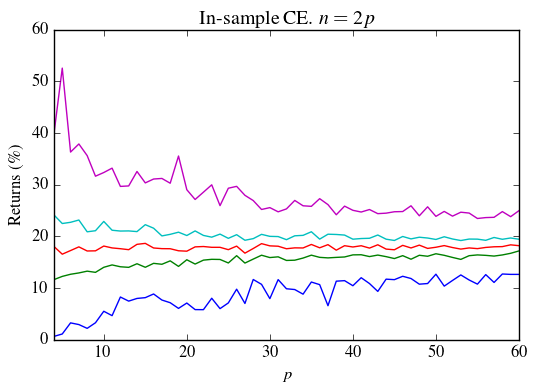

In [29]:
plt.plot(*five_stats(CEs_ins,ps))
plt.xlabel('$p$')
plt.ylabel('Returns (\%)')
plt.axis(xmin=4)
plt.title('In-sample CE. $n = 2p$');

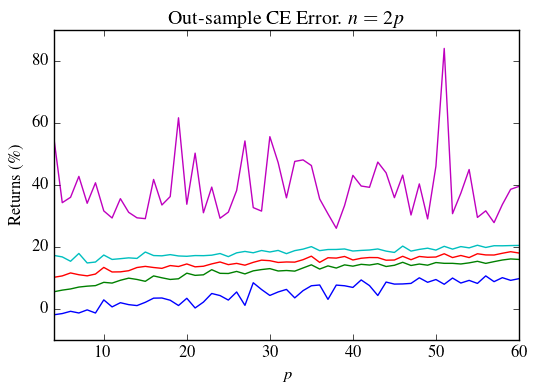

In [30]:
plt.plot(*five_stats(CEs_ins-CEs_oos,ps))
plt.xlabel('$p$')
plt.ylabel('Returns (\%)')
plt.axis(xmin=4)
plt.title('Out-sample CE Error. $n = 2p$');

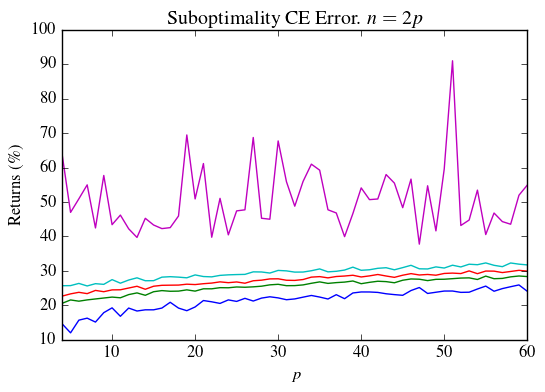

In [36]:
plt.plot(*five_stats(CE_star_q_star - CEs_oos,ps))
plt.xlabel('$p$')
plt.ylabel('Returns (\%)');
plt.axis(xmin=4)
plt.title('Suboptimality CE Error. $n = 2p$');